<a href="https://colab.research.google.com/github/AbdulBaseerMohammedKhan/Trix.edu/blob/master/Trix_edu_ABCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.stats import rankdata
%matplotlib nbagg

In [ ]:

def getABCD(i):
    
    
    
    sumby2=corners[i][0][:,0]+corners[i][0][:,1]/2
    ranking=rankdata(sumby2)
    if ranking[0]==1.0:
        return('A')
    elif ranking[0]==3.0:
        return('D')
    elif ranking[0]==4.0:
        return('C')
    elif ranking[0]==2.0:
        return('B')


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


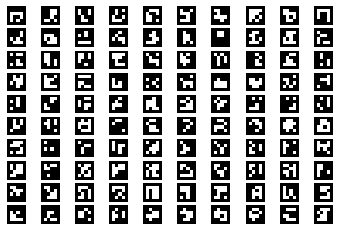

In [ ]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250) #get the dictionary of aruco markers with this


fig = plt.figure()
nx = 10
ny = 10
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

#plt.savefig("data/100markers.pdf")#store 100 markers in the pdf file 
plt.show()


<IPython.core.display.Javascript object>

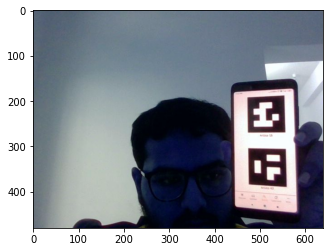

In [ ]:
frame = cv2.imread(take_photo())#the image you want to check
plt.figure()
plt.imshow(frame)
plt.show()

In [ ]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

CPU times: user 11.3 ms, sys: 22 µs, total: 11.3 ms
Wall time: 74 ms


A [43]
A [18]


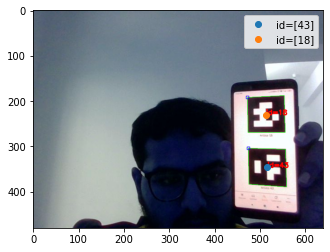

In [ ]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
    print(getABCD(i),ids[i])
plt.legend()
plt.show()
# get the number of markers with this